# Houston Astros Questionnaire

## 8
Over the last few seasons, there’s been a lot of discussion in and around baseball about the qualities of the ball itself. Many have claimed that the ball has become ‘juiced’, causing batted balls to travel further in the air than they had in previous seasons and resulting in notably higher home run rates. A prominent hypothesis as to the manner with which the ball changed concerns its drag coefficient. Drag is a measure of a projectile’s sensitivity to air resistance opposite the direction it’s traveling. A projectile with a lower drag coefficient will travel through the air further than a similar projectile with a higher drag coefficient, all else equal.

Provided is a random sample of major league batted ball data from the past five seasons. You’re tasked with analyzing the data to determine whether or not the ball actually varied over these five seasons. Provide any code you used to generate your conclusion (a markdown or notebook file is recommended!) and present your argument for when and how the ball varied. Illustrations/data visualizations to help communicate your findings are encouraged. 
*Please spend no more than 4 hours on this question.*


Fields:
1.	year
2.	month
3.	pitcher_throws ('L' for left handed pitcher, 'R' for right handed pitcher)
4.	bat_side ('L' for left handed batter, 'R' for right handed batter)
5.	pitch_type ('FF' for four-seam fastball, 'FT' for two-seam fastball)
6.	release_speed (magnitude of velocity of the pitch towards the plate at 50' in mph)
7.	plate_speed (magnitude of velocity of pitch as it crosses the front of home plate in mph)
8.	hit_exit_speed (magnitude of velocity of the batted ball upon contact in mph)
9.	hit_spinrate (rate of rotation of the ball upon contact in rpm)
10.	hit_vertical_angle (launch angle; direction of the ball off the bat on the vertical plane -- 0 degrees is parallel to the ground, positive is up, negative is down, in degrees)
11.	hit_bearing (direction from the tip of home plate to the initial landing position of the batted ball on the horizontal plane -- 0 degrees is directly up the middle, positive is towards the 1st base side, negative is towards the 3rd base side, in degrees)
12.	hit_distance (distance between the tip of home plate and the initial landing position of the batted ball in feet)
13.	event_result (text field describing the category of batted ball event outcome)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt

## Data

In [2]:
df = pd.read_csv('/workspaces/astros_case-study/data_sample.csv')
df.head()

,year,month,pitcher_throws,bat_side,pitch_type,release_speed,plate_speed,hit_exit_speed,hit_spinrate,hit_vertical_angle,hit_bearing,hit_distance,event_result
0,2016,7,R,R,FF,93.433688,85.791840,101.387283,1954.304443,25.563499,-22.539516,392.216400,home_run
1,2016,5,L,R,FT,89.341958,82.691620,94.986938,5588.018066,60.409538,-46.960789,210.558151,field_out
2,2016,4,R,L,FF,91.367354,84.554413,80.617020,2264.892334,30.243307,39.408298,294.240204,field_out
3,2016,6,L,R,FT,95.602141,88.467468,NaN,NaN,NaN,NaN,NaN,field_out
4,2016,7,R,R,FF,91.033388,84.686417,104.878571,1015.863892,12.043263,1.585894,301.306915,field_out


In [3]:
df.describe()

,year,month,release_speed,plate_speed,hit_exit_speed,hit_spinrate,hit_vertical_angle,hit_bearing,hit_distance
count,5000.000000,5000.000000,5000.000000,5000.000000,4522.000000,2939.000000,4522.000000,4522.000000,4522.000000
mean,2017.000000,6.555600,91.882837,84.985879,89.997665,2747.016428,11.998355,-0.310381,178.682747
std,1.414355,1.734217,2.817465,2.649820,13.984109,1287.734854,24.391452,26.953949,137.925585
min,2015.000000,3.000000,79.315483,73.368980,19.051146,414.808960,-73.101883,-179.131378,0.506874
25%,2016.000000,5.000000,90.176728,83.369785,82.775057,1682.917419,-3.684100,-18.847590,26.810730
50%,2017.000000,7.000000,91.971830,85.065407,92.808498,2574.025635,12.943902,-0.594337,188.074951
75%,2018.000000,8.000000,93.789923,86.806101,100.107733,3729.503418,28.040596,18.584233,303.585815
max,2019.000000,10.000000,103.396928,95.852409,117.753525,6855.195312,87.656059,176.065750,468.331482


In [4]:
df.shape

(5000, 13)

### Cleaning the Data

In [5]:
# count the number of NaN values in each column
print(df.isnull().sum())

year                     0
month                    0
pitcher_throws           0
bat_side                 0
pitch_type               0
release_speed            0
plate_speed              0
hit_exit_speed         478
hit_spinrate          2061
hit_vertical_angle     478
hit_bearing            478
hit_distance           478
event_result             0
dtype: int64


If a variable contains 478 or more null values, the mean value of records from the respective class will be imputated. If a variable contains fewer than 478 values, it will be imputed with the records from the previous, non-null value from a row with the same class.

In [6]:
for i in df.columns:
  if i not in ['year', 'event_result']:
    if df[i].isnull().sum() >= 478:
      df[i] = df[i].fillna(df.groupby('event_result')[i].transform('mean'))
    elif df[i].isnull().sum() < 478 and df[i].isnull().sum() > 0:
      df[i] = df[i].fillna(df.groupby('event_result')[i].ffill())

df.head()

,year,month,pitcher_throws,bat_side,pitch_type,release_speed,plate_speed,hit_exit_speed,hit_spinrate,hit_vertical_angle,hit_bearing,hit_distance,event_result
0,2016,7,R,R,FF,93.433688,85.791840,101.387283,1954.304443,25.563499,-22.539516,392.216400,home_run
1,2016,5,L,R,FT,89.341958,82.691620,94.986938,5588.018066,60.409538,-46.960789,210.558151,field_out
2,2016,4,R,L,FF,91.367354,84.554413,80.617020,2264.892334,30.243307,39.408298,294.240204,field_out
3,2016,6,L,R,FT,95.602141,88.467468,87.839912,3158.063870,14.402197,0.460784,172.485307,field_out
4,2016,7,R,R,FF,91.033388,84.686417,104.878571,1015.863892,12.043263,1.585894,301.306915,field_out


In [7]:
# check the missing values were handled
print(df.isnull().sum())

year                   0
month                  0
pitcher_throws         0
bat_side               0
pitch_type             0
release_speed          0
plate_speed            0
hit_exit_speed         0
hit_spinrate          12
hit_vertical_angle     0
hit_bearing            0
hit_distance           0
event_result           0
dtype: int64


In [8]:
# count the percentage of null/missing values for each variable
percent_missing = df.isnull().sum() / len(df) * 100
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
print(percent_missing)

year                  0.00
month                 0.00
pitcher_throws        0.00
bat_side              0.00
pitch_type            0.00
release_speed         0.00
plate_speed           0.00
hit_exit_speed        0.00
hit_spinrate          0.24
hit_vertical_angle    0.00
hit_bearing           0.00
hit_distance          0.00
event_result          0.00
dtype: float64


Since there are only 12 missing values left in the hit_spinrate column and this is only 0.24% of the total data, we can drop these few values and still feel confident about our data.

In [9]:
df1 = df.dropna()
df1.head()

,year,month,pitcher_throws,bat_side,pitch_type,release_speed,plate_speed,hit_exit_speed,hit_spinrate,hit_vertical_angle,hit_bearing,hit_distance,event_result
0,2016,7,R,R,FF,93.433688,85.791840,101.387283,1954.304443,25.563499,-22.539516,392.216400,home_run
1,2016,5,L,R,FT,89.341958,82.691620,94.986938,5588.018066,60.409538,-46.960789,210.558151,field_out
2,2016,4,R,L,FF,91.367354,84.554413,80.617020,2264.892334,30.243307,39.408298,294.240204,field_out
3,2016,6,L,R,FT,95.602141,88.467468,87.839912,3158.063870,14.402197,0.460784,172.485307,field_out
4,2016,7,R,R,FF,91.033388,84.686417,104.878571,1015.863892,12.043263,1.585894,301.306915,field_out


In [10]:
# check the number of NaN values in each column
print(df1.isnull().sum())

year                  0
month                 0
pitcher_throws        0
bat_side              0
pitch_type            0
release_speed         0
plate_speed           0
hit_exit_speed        0
hit_spinrate          0
hit_vertical_angle    0
hit_bearing           0
hit_distance          0
event_result          0
dtype: int64


## Distance

Has the ball been hit farther the past few seasons?

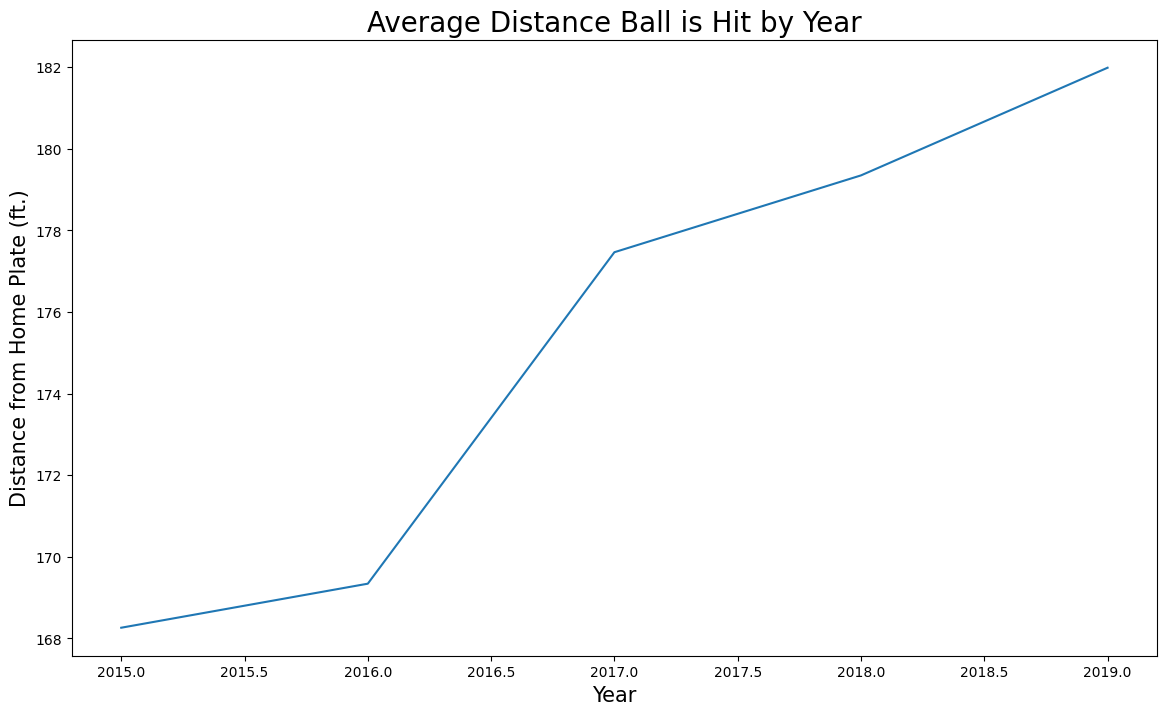

In [11]:
# average hit_distance by year
df1.groupby('year')['hit_distance'].mean().plot(kind='line', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Average Distance Ball is Hit by Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Distance from Home Plate (ft.)", fontsize=15)

plt.show()

From the line graph above, it is clear that batted balls are traveling farther than they had in previous seasons.

Now that the premise of the question has been proven, the cause of this will be investigated.

### Distance vs. Month

As the months change, the seasons change, and the air pressure and wind speed and direction changes. Of course, these change daily, but this information is unknown, so the problem is simplified to a monthly basis.

Here, the distance the ball is hit vs. the month is examined to find out whether the months/seasons have any effect on the distances.

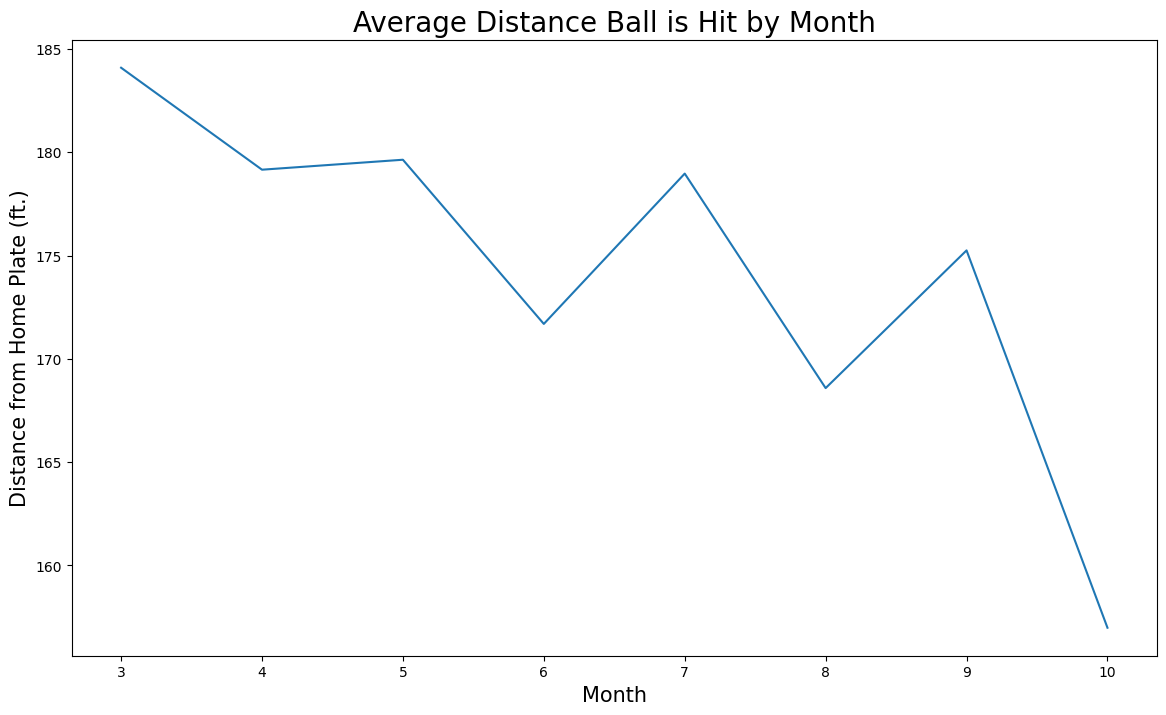

In [12]:
# average hit_distance by month
df1.groupby('month')['hit_distance'].mean().plot(kind='line', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Average Distance Ball is Hit by Month", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Distance from Home Plate (ft.)", fontsize=15)

plt.show()

In [13]:
print('The avg. distance (ft.) the balls are hit from home over all the seasons is ',
    df1['hit_distance'].mean())

print('The avg. distance (ft.) the balls are hit from home in March is ',
      df1.loc[df1['month'] ==  3, 'hit_distance'].mean())

print('The avg. distance (ft.) the balls are hit from home in October is ',
      df1.loc[df1['month'] ==  10, 'hit_distance'].mean())

The avg. distance (ft.) the balls are hit from home over all the seasons is  175.28161178189657
The avg. distance (ft.) the balls are hit from home in March is  184.0954132226118
The avg. distance (ft.) the balls are hit from home in October is  156.98443461070607


As the baseball season goes on, the average distance the ball is hit from home plate decreases, though only a matter of approximately 30 feet. This small distance suggests the changing of the months is negligle.

### Distance vs. Year, Month

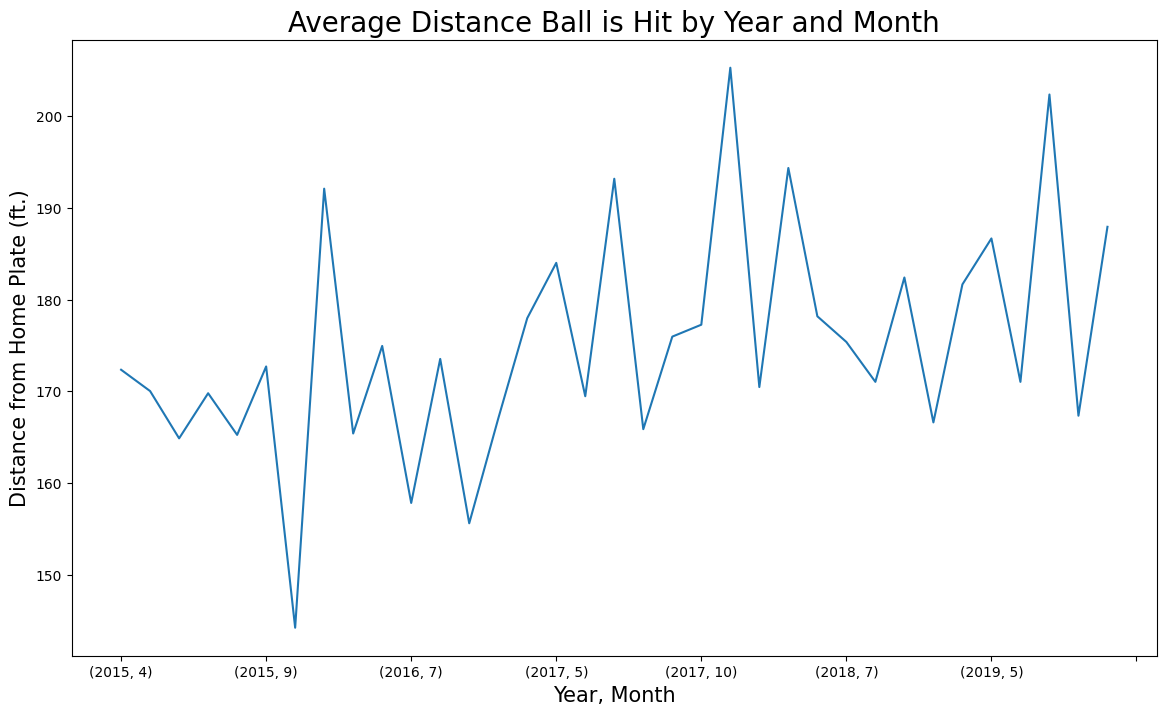

In [14]:
# average hit_distance by month
df1.groupby(['year', 'month'])['hit_distance'].mean().plot(kind='line', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Average Distance Ball is Hit by Year and Month", fontsize=20)
plt.xlabel("Year, Month", fontsize=15)
plt.ylabel("Distance from Home Plate (ft.)", fontsize=15)

plt.show()

The line graph above confirms the first distance vs. year line graph that showed the ball is being hit farther from home as the years have gone on. It also shows a deeper look at how the distances normally fluctuate over a season.

## Speed

### Pitch Speed

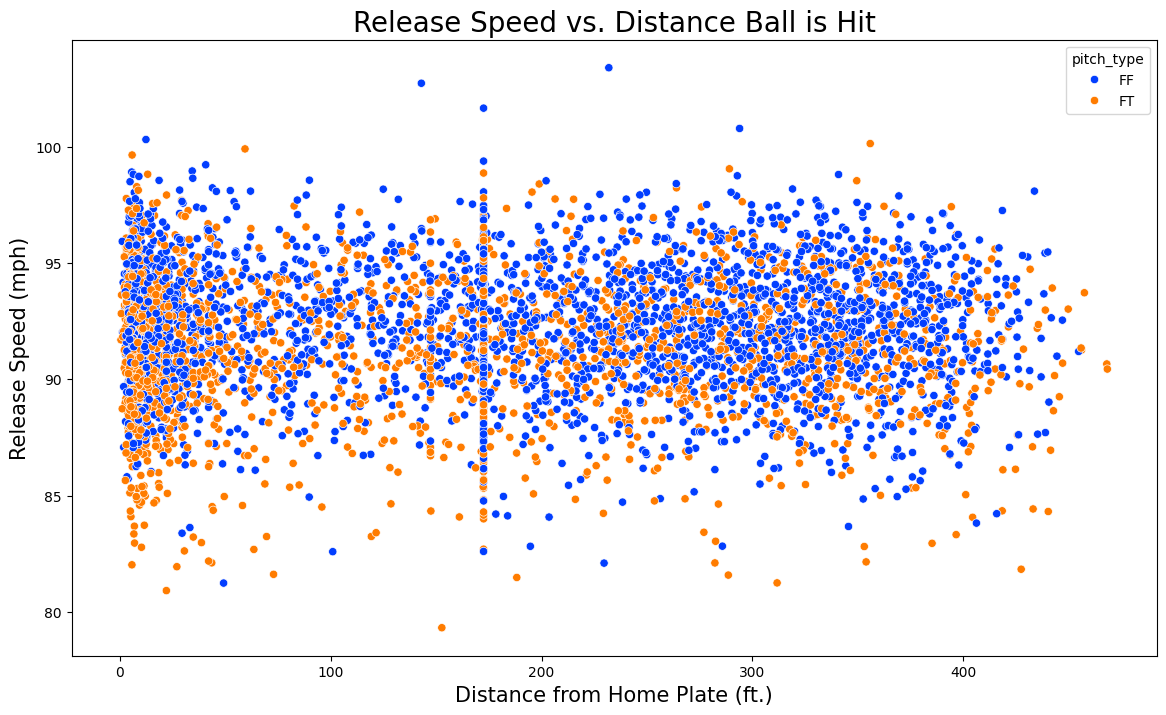

In [15]:
# release_speed vs. distance
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df1, x='hit_distance', y='release_speed', hue='pitch_type', palette='bright')

# label chart and axes
plt.title("Release Speed vs. Distance Ball is Hit", fontsize=20)
plt.xlabel("Distance from Home Plate (ft.)", fontsize=15)
plt.ylabel("Release Speed (mph)", fontsize=15)

plt.show()

The scatterplot above clearly shows little to no correlation between the magnitude of the velocity of the pitch towards home plate and the distance a ball is hit. From the color-coding, it also shows the type of fastball has little to no affect on the distance.

### Exit Speed
The exit speed will be examined to see how it has affected the distance the hit ball has traveled from home plate.

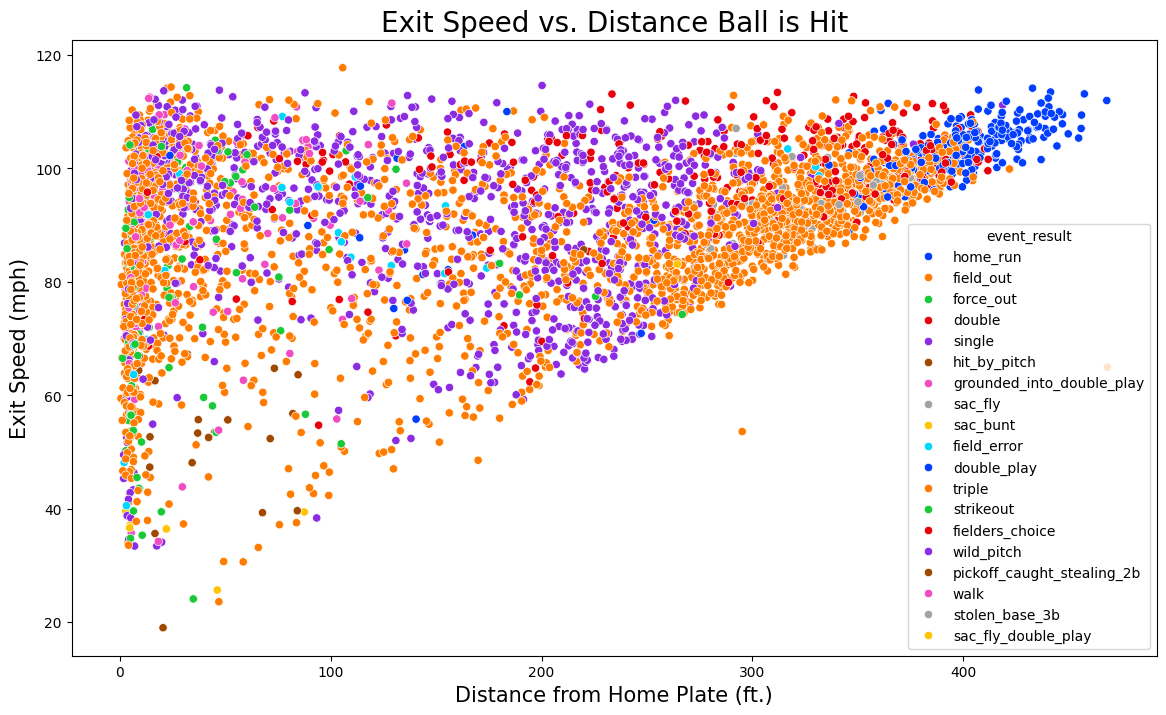

In [16]:
# hit_exit_speed vs. distance
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df1, x='hit_distance', y='hit_exit_speed', hue='event_result', palette='bright')

# label chart and axes
plt.title("Exit Speed vs. Distance Ball is Hit", fontsize=20)
plt.xlabel("Distance from Home Plate (ft.)", fontsize=15)
plt.ylabel("Exit Speed (mph)", fontsize=15)

plt.show()

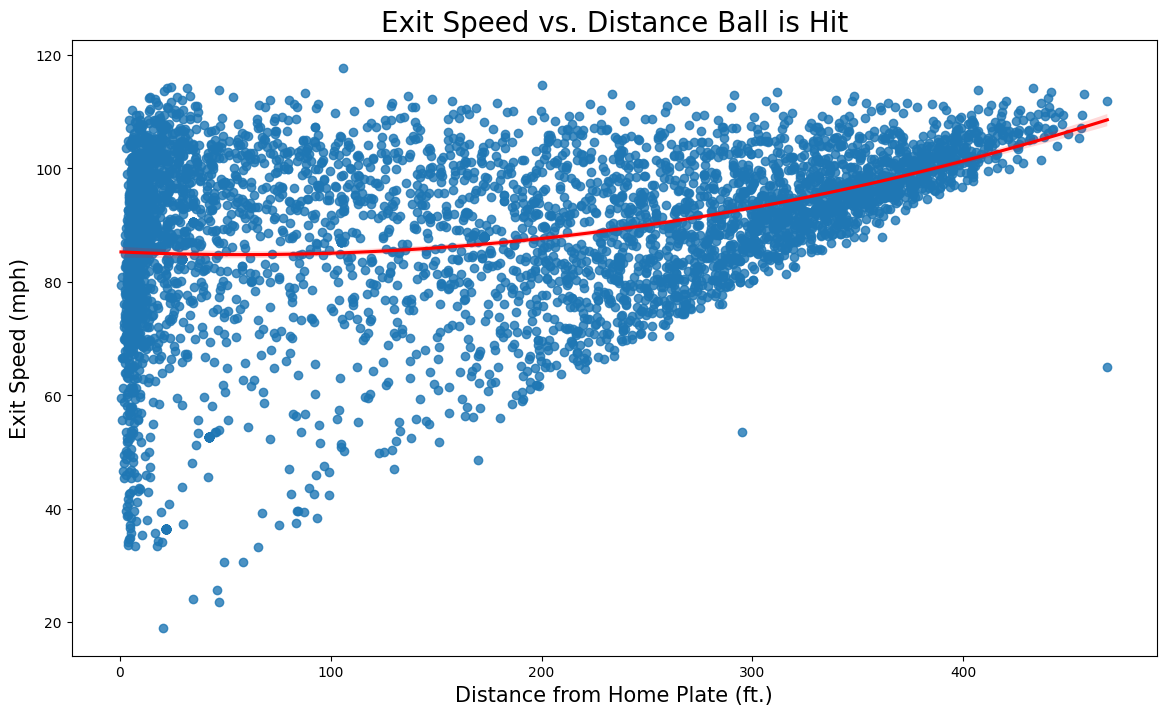

In [17]:
# hit_exit_speed vs. distance
plt.figure(figsize=(14, 8))
sns.regplot(data=df1, x='hit_distance', y='hit_exit_speed',
            order=2, line_kws=dict(color='r'))

# label chart and axes
plt.title("Exit Speed vs. Distance Ball is Hit", fontsize=20)
plt.xlabel("Distance from Home Plate (ft.)", fontsize=15)
plt.ylabel("Exit Speed (mph)", fontsize=15)

plt.show()

The above two scatterplots show a positive correlation between the magnitude of velocity of the batted ball upon contact and the distance the ball is hit: as the exit speed increases, the distance increases.

#### Exit Speed vs Year
Since the exit speed affects the distance the ball travels, the exit speed must be examined further to find out if it has changed over the years.

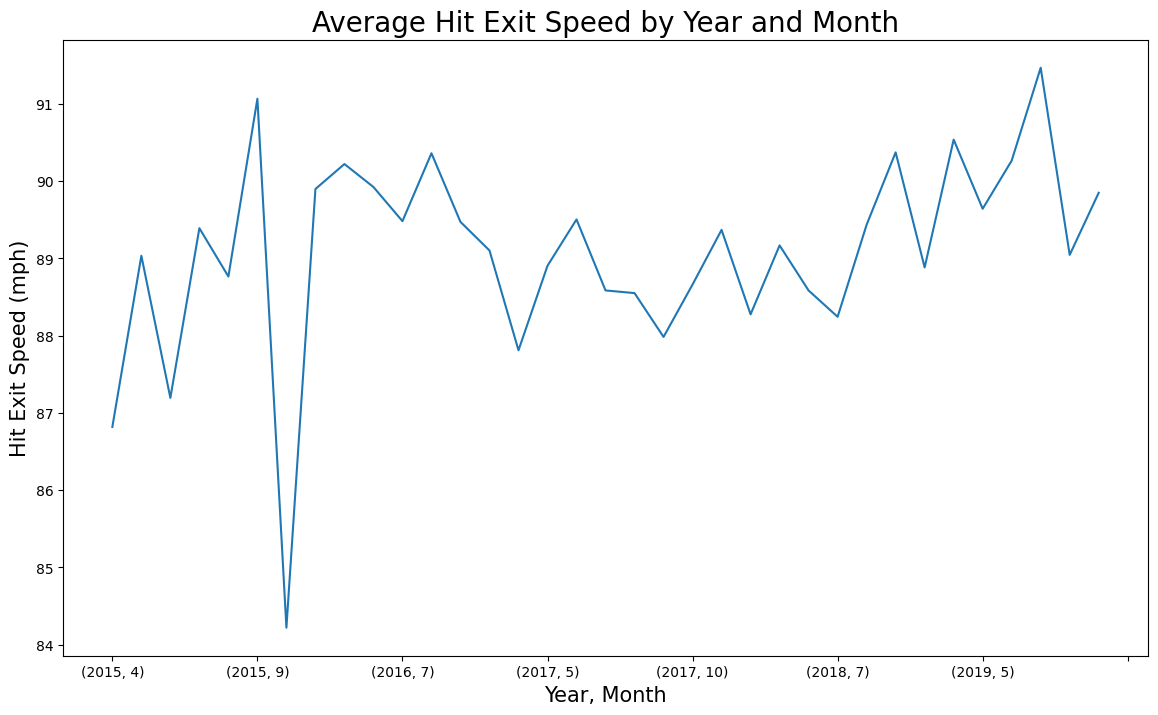

In [18]:
# average hit exit speed by month, year
df1.groupby(['year', 'month'])['hit_exit_speed'].mean().plot(kind='line', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Average Hit Exit Speed by Year and Month", fontsize=20)
plt.xlabel("Year, Month", fontsize=15)
plt.ylabel("Hit Exit Speed (mph)", fontsize=15)

plt.show()

The average hit exit speed has fluctuated throughout the years, and even significantly decreased for one month at the beginning of the 2016 season. However, it appears to be steadily increasing overall. This will be further investigated in the next graph.

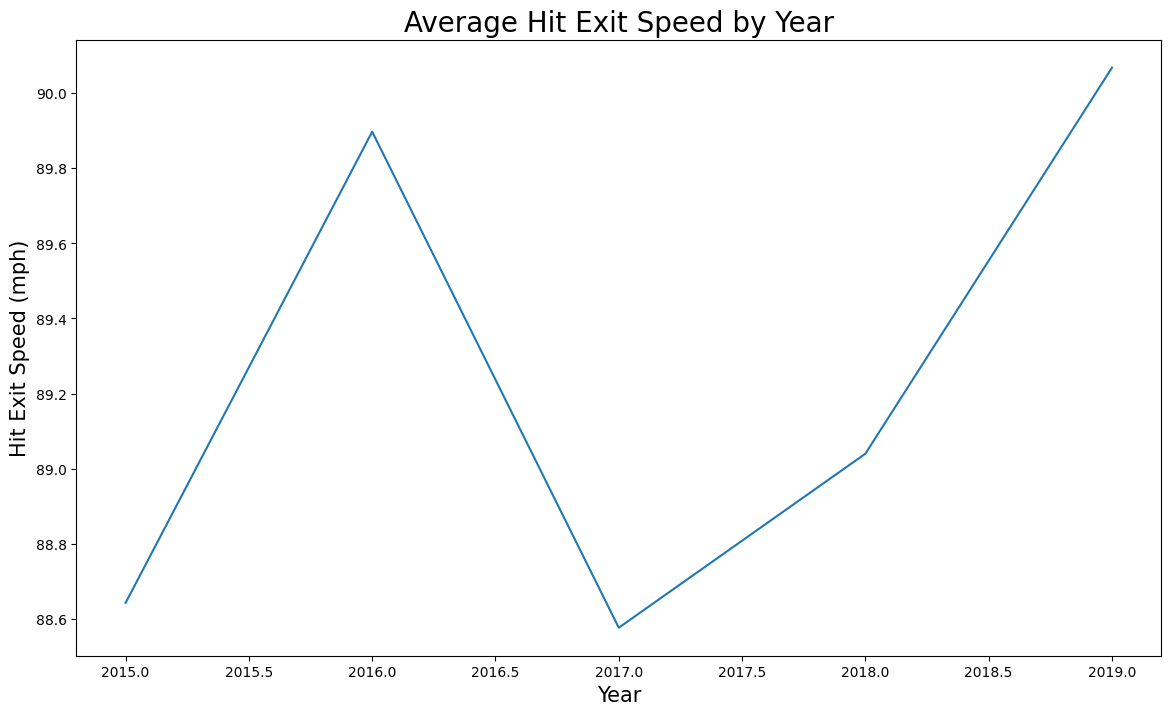

In [19]:
# hit_exit_speed vs. year
plt.figure(figsize=(14, 8))
sns.lineplot(df1.groupby('year')['hit_exit_speed'].mean())

# label chart and axes
plt.title("Average Hit Exit Speed by Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Hit Exit Speed (mph)", fontsize=15)

plt.show()

The average hit exit speed seems to have been increasing overall between 2015 and 2019; however, the exit speeds averaged a five-year low in 2017. This does not match with the first distance vs year graph that showed the ball was hit an average of 178 ft from home in 2017, an increase from the previous years. This increase in the distance but decrease in hit exit speed, initial velocity of the ball, implies a change in the drag coefficient, that the ball was "juiced."

At the same time, there is an increase in both the hit exit speed and the distance after 2017. So, it cannot yet be confidently said the ball was "juiced".

#### Exit Speeds and Distances Over the Years
A coefficient will be created to finally compare the hit exit speed and the distance the ball is hit. The distance is divided by the exit speed to create a new column in the dataframe, 'dist_speed'. If this has changed over the years, it will give some idea as to whether the drag has changed.

In [20]:
# convert exit speed mph to ft/hr
df1['hit_exit_speed_ft'] = df1['hit_exit_speed']*5280

# hit_distance (ft) / hit_exit_speed_ft (ft/hr)
df1['dist_speed'] = df1['hit_distance']/df1['hit_exit_speed_ft']

/tmp/ipykernel_2209/2103940686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hit_exit_speed_ft'] = df1['hit_exit_speed']*5280
/tmp/ipykernel_2209/2103940686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dist_speed'] = df1['hit_distance']/df1['hit_exit_speed_ft']


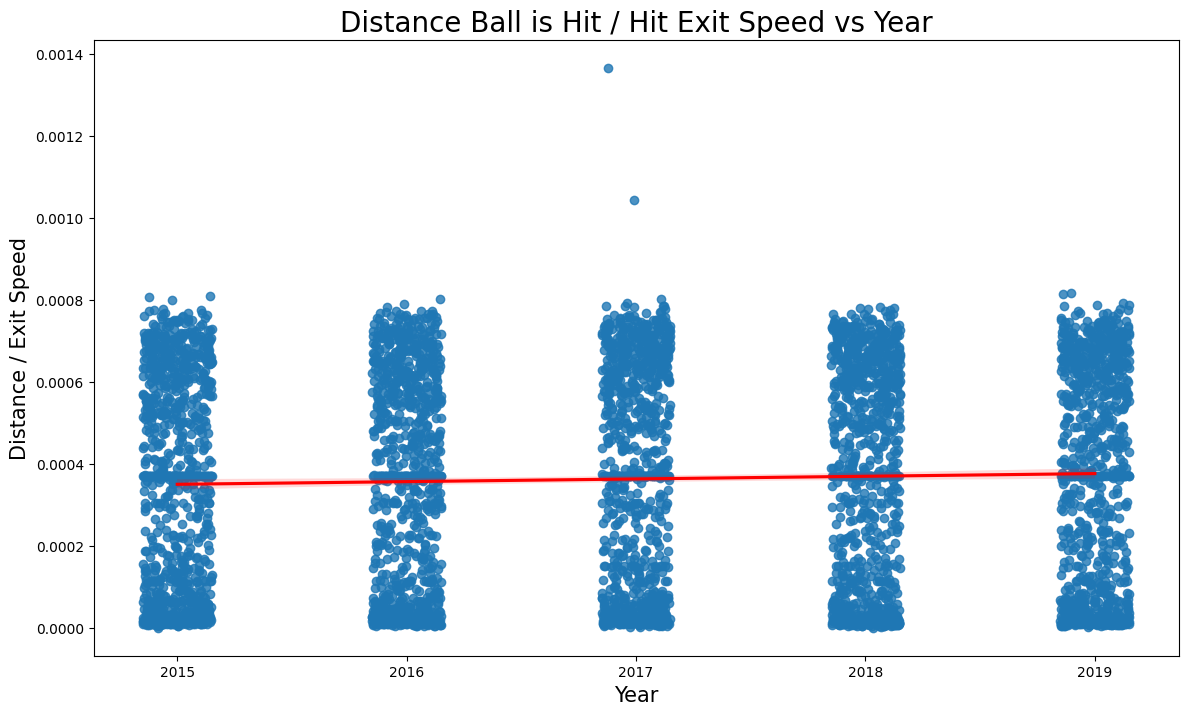

In [21]:
# hit_exit_speed vs. distance
plt.figure(figsize=(14, 8))
sns.regplot(data=df1, x='year', y='dist_speed', 
            x_jitter=0.15, line_kws=dict(color='r'))

# label chart and axes
plt.title("Distance Ball is Hit / Hit Exit Speed vs Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Distance / Exit Speed", fontsize=15)

plt.show()

From glancing at the scatterplot above, distance divided by exit speed of the batted ball has not changed over the years. This means **the drag on the baseballs has likely not changed.** Two outliers are also seen in 2017, which contributed to the low average exit speeds in the line graph above. Since hit exit speeds have mostly increased over the years along with the distance the ball was hit, this is not surprising. A more likely explanation is the batters are stronger, they are hitting the balls harder, and thus farther.